# Comprehension des données 

Le Single-Cell RNA-Seq (ou scRNA-seq) est une technique de séquençage de l'ARN qui permet de mesurer l'expression génique dans des cellules individuelles

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data(
    path="/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers"
)

#X_train, y_train = get_train_data()
X_test, y_test = get_test_data(
    path="/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers"
)


In [6]:
lab_df = pd.DataFrame({'label': y_train})
lab_df.value_counts(normalize=True)

label       
T_cells_CD8+    0.342
T_cells_CD4+    0.336
Cancer_cells    0.237
NK_cells        0.085
Name: proportion, dtype: float64

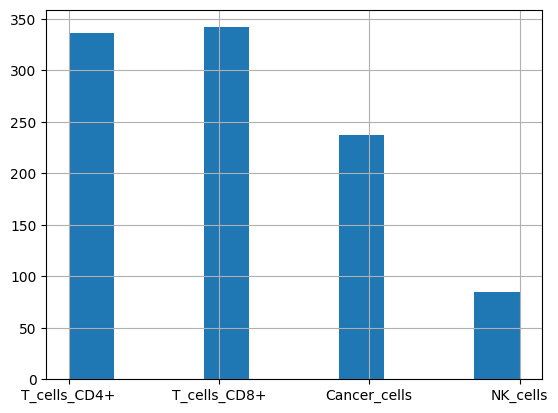

In [7]:
lab_df.label.hist();

Premier problème observé : le nombre de classes n’est pas le même, ce qui peut avoir un impact sur la création et les performances du modèle.

In [8]:
total_genes_counts = X_train.toarray().sum(axis=0)
total_cell_counts = X_train.toarray().sum(axis=1)

In [9]:
X_dense = X_train.toarray()

summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print(summary)


total_values = X_train.shape[0] * X_train.shape[1]  # nombre total de cases
num_nonzero = X_train.count_nonzero()                # nombre de valeurs non nulles
num_zeros = total_values - num_nonzero              # nombre de zéros
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")


   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%


In [10]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary)

# Sparsité globale
total_values = X_train.shape[0] * X_train.shape[1]
num_nonzero = X_train.count_nonzero()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# =====================================
# 2️⃣ Library Size Normalization (CORRIGÉE)
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1

# Facteur standard scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation (étape clé)
X_log = np.log1p(X_libnorm)

# =====================================
# 3️⃣ Résumé FINAL (sur X_log)
# =====================================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})

print("\nRésumé après Library Size + log1p :")
print(summary_log)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%

Résumé après Library Size + log1p :
   min       max     mean  median       std  sparsity
0  0.0  8.753845  0.13638     0.0  0.532629  0.919478


In [11]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary_raw = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary_raw)

# =====================================
# 2️⃣ Library Size Normalization
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

# Facteur recommandé scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

summary_lib = pd.DataFrame({
    "min": [X_libnorm.min()],
    "max": [X_libnorm.max()],
    "mean": [X_libnorm.mean()],
    "median": [np.median(X_libnorm)],
    "std": [X_libnorm.std()],
    "sparsity": [(X_libnorm == 0).sum() / X_libnorm.size]
})
print("\nRésumé après Library Size Normalization :")
print(summary_lib)

# =====================================
# 3️⃣ Option : log1p (facultatif)
# =====================================
X_log = np.log1p(X_libnorm)  # si tu veux garder les valeurs brutes, saute cette étape

# =====================================
# 4️⃣ Normalisation L1 par cellule (somme = 1)
# =====================================
# Choisis la version à utiliser : log ou pas
X_final = X_log  # ou X_libnorm si tu ne veux pas de log
X_sum1 = X_final / X_final.sum(axis=1, keepdims=True)

# Vérification
print("\nSomme par cellule (les 5 premières) :")
print(X_sum1.sum(axis=1)[:5])

# =====================================
# 5️⃣ Résumé final
# =====================================
summary_final = pd.DataFrame({
    "min": [X_sum1.min()],
    "max": [X_sum1.max()],
    "mean": [X_sum1.mean()],
    "median": [np.median(X_sum1)],
    "std": [X_sum1.std()],
    "sparsity": [(X_sum1 == 0).sum() / X_sum1.size]
})
print("\nRésumé final après L1 par cellule :")
print(summary_final)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478

Résumé après Library Size Normalization :
   min          max      mean  median       std  sparsity
0  0.0  6333.998535  0.737953     0.0  9.128844  0.919478

Somme par cellule (les 5 premières) :
[1.        0.9999999 1.        0.9999999 1.       ]

Résumé final après L1 par cellule :
   min       max      mean  median       std  sparsity
0  0.0  0.015987  0.000074     0.0  0.000339  0.919478


# Problème : le nombre de gènes

In [12]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary)

# Sparsité globale
total_values = X_train.shape[0] * X_train.shape[1]
num_nonzero = X_train.count_nonzero()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# =====================================
# 2️⃣ Library Size Normalization (CORRIGÉE)
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1

# Facteur standard scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation (étape clé)
X_log = np.log1p(X_libnorm)

# =====================================
# 3️⃣ Résumé FINAL (sur X_log)
# =====================================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})

print("\nRésumé après Library Size + log1p :")
print(summary_log)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%

Résumé après Library Size + log1p :
   min       max     mean  median       std  sparsity
0  0.0  8.753845  0.13638     0.0  0.532629  0.919478


In [13]:
num_colonnes = X_train.shape[1]
print("Nombre de colonnes :", num_colonnes)


Nombre de colonnes : 13551


In [14]:
import pandas as pd

# Conversion en dense
X_dense = X_train.toarray()

# Créer le DataFrame
df = pd.DataFrame(X_dense)

# Correction ici
df["label"] = y_train.to_numpy()  

# Séparer chaque classe
df_cancer = df[df['label'] == 'Cancer_cells'].drop(columns=['label'])
df_nk     = df[df['label'] == 'NK_cells'].drop(columns=['label'])
df_cd4    = df[df['label'] == 'T_cells_CD4+'].drop(columns=['label'])
df_cd8    = df[df['label'] == 'T_cells_CD8+'].drop(columns=['label'])

# Vérification
print("Cancer cells :", df_cancer.shape)
print("NK cells :", df_nk.shape)
print("T_cells_CD4+ :", df_cd4.shape)
print("T_cells_CD8+ :", df_cd8.shape)



Cancer cells : (237, 13551)
NK cells : (85, 13551)
T_cells_CD4+ : (336, 13551)
T_cells_CD8+ : (342, 13551)


In [15]:
import numpy as np
import pandas as pd

# df_cancer : DataFrame des cellules Cancer_cells

# Résumé statistique
summary = pd.DataFrame({
    "min": [df_cancer.min().min()],
    "max": [df_cancer.max().max()],
    "mean": [df_cancer.mean().mean()],
    "median": [np.median(df_cancer.values)],
    "std": [df_cancer.stack().std()],
    "sparsity": [(df_cancer == 0).sum().sum() / df_cancer.size]
})
print("Résumé statistique :")
print(summary)

# Nombre total de zéros
total_values = df_cancer.shape[0] * df_cancer.shape[1]
num_nonzero = (df_cancer.values != 0).sum()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")


Résumé statistique :
   min     max      mean  median       std  sparsity
0  0.0  3260.0  0.472413     0.0  6.245546  0.875973
Nombre total de zéros : 2,813,265
Proportion de zéros (sparsité) : 87.60%


6       559.0
7      7265.0
12    30548.0
13      525.0
14      546.0
dtype: float32


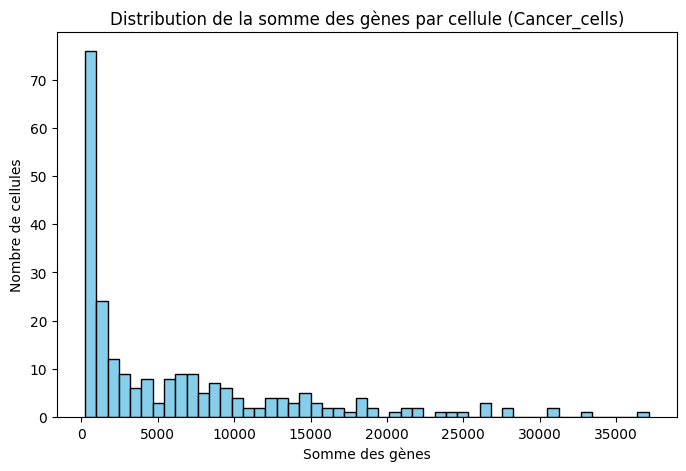

In [16]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cancer.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (Cancer_cells)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()


Résumé des données brutes (Cancer_cells) :
   min     max      mean  median       std  sparsity
0  0.0  3260.0  0.472413     0.0  6.245545  0.875973
Nombre total de zéros : 2,813,265
Proportion de zéros (sparsité) : 87.60%


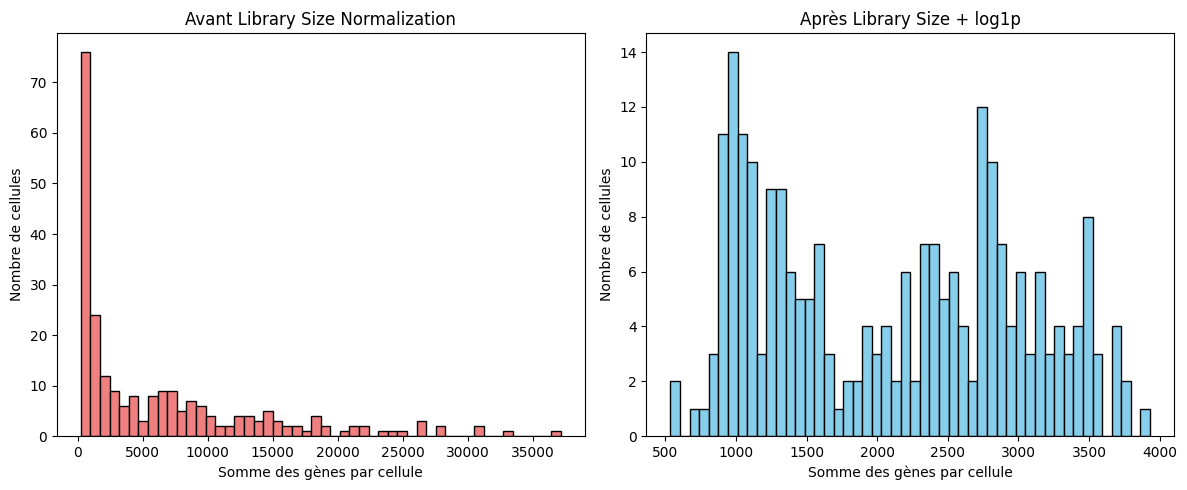


Résumé après Library Size + log1p (Cancer_cells) :
   min       max      mean  median       std  sparsity
0  0.0  8.753845  0.154945     0.0  0.522664  0.875973


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : Cancer_cells
# -----------------------------
X_dense = df_cancer.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (Cancer_cells) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightcoral', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (Cancer_cells) :")
print(summary_log)


8     1946.0
21    3251.0
35     881.0
39    6636.0
85    1355.0
dtype: float32


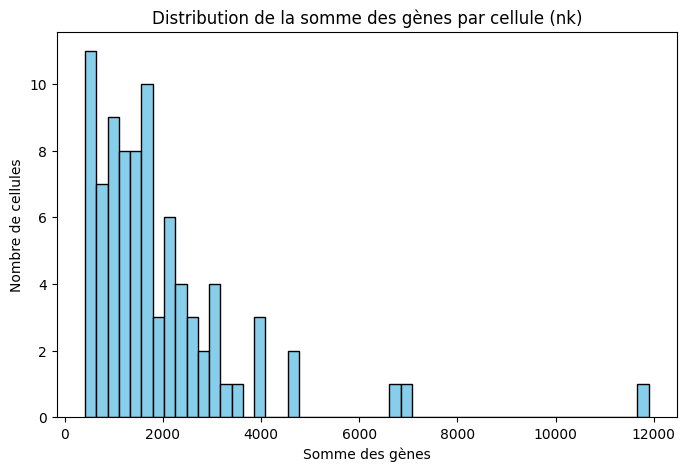

In [18]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_nk.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (nk)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (NK_cells) :
   min    max      mean  median       std  sparsity
0  0.0  387.0  0.143083     0.0  1.593363  0.937521
Nombre total de zéros : 1,079,870
Proportion de zéros (sparsité) : 93.75%


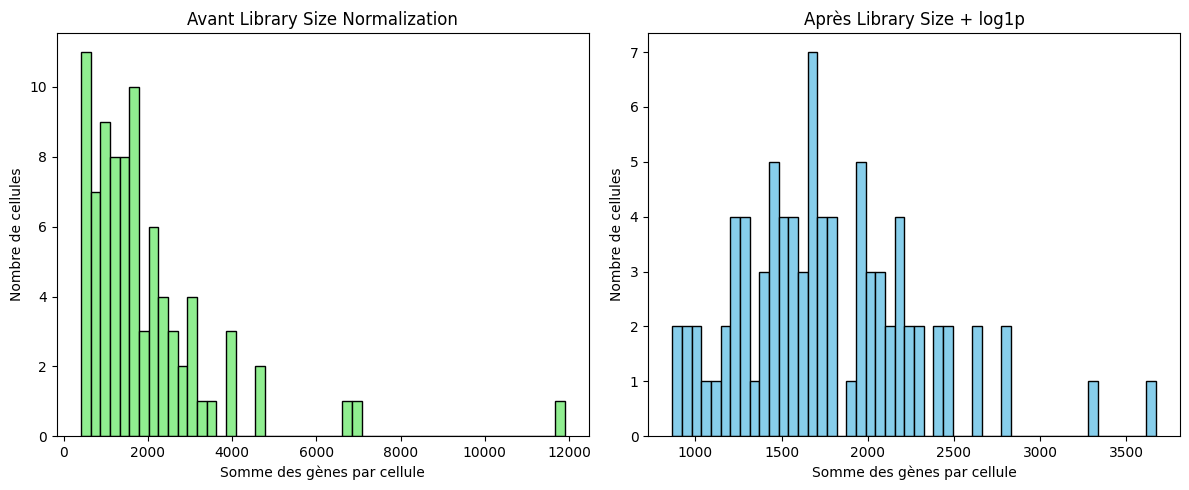


Résumé après Library Size + log1p (NK_cells) :
   min       max      mean  median       std  sparsity
0  0.0  7.492904  0.129816     0.0  0.544178  0.937521


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : NK_cells
# -----------------------------
X_dense = df_nk.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (NK_cells) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightgreen', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (NK_cells) :")
print(summary_log)


0    14123.0
1     4867.0
2     1307.0
3      551.0
5     1952.0
dtype: float32


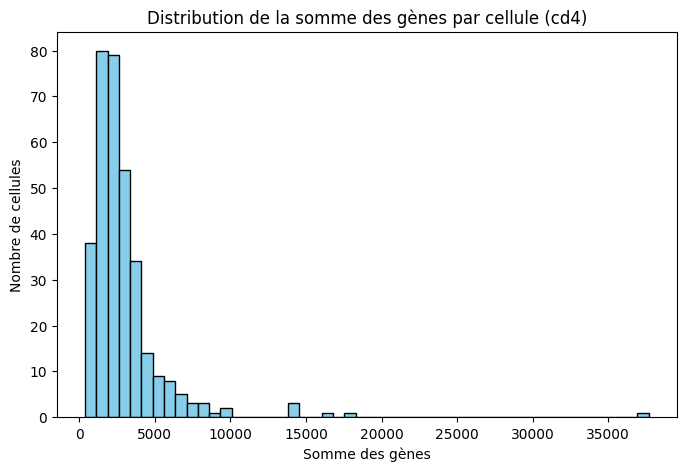

In [20]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cd4.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (cd4)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (T_cells_CD4+) :
   min    max      mean  median       std  sparsity
0  0.0  751.0  0.218655     0.0  2.532722  0.924209
Nombre total de zéros : 4,208,050
Proportion de zéros (sparsité) : 92.42%


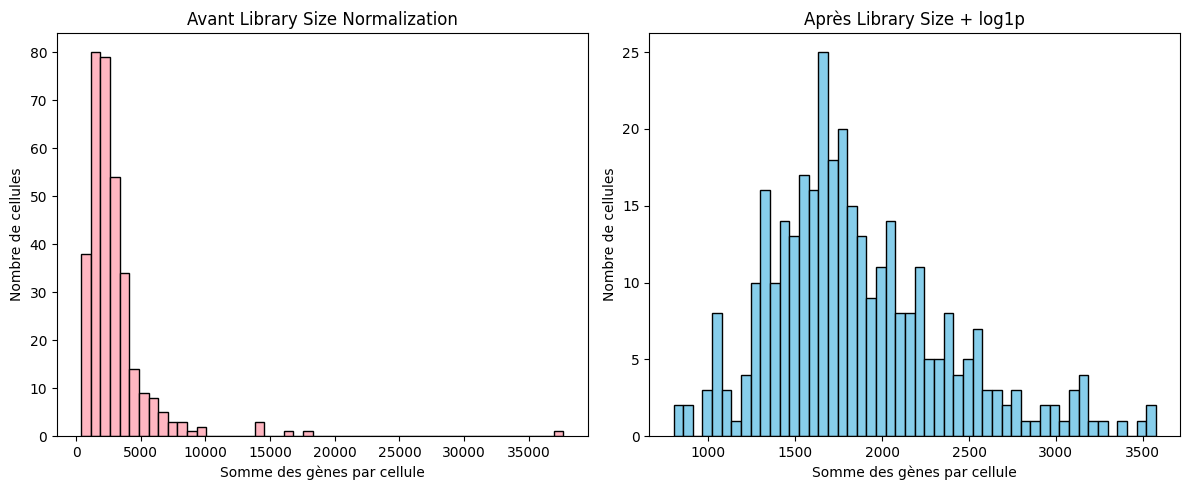


Résumé après Library Size + log1p (T_cells_CD4+) :
   min       max      mean  median       std  sparsity
0  0.0  8.194632  0.137087     0.0  0.533972  0.924209


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : T_cells_CD4+
# -----------------------------
X_dense = df_cd4.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (T_cells_CD4+) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightpink', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (T_cells_CD4+) :")
print(summary_log)


4     1118.0
9     2947.0
22     328.0
24    2878.0
29    1314.0
dtype: float32


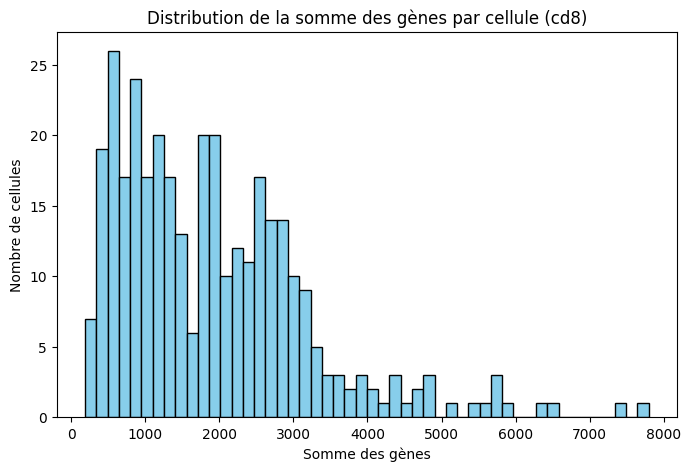

In [22]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cd8.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (cd8)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (T_cells_CD8+) :
   min    max     mean  median       std  sparsity
0  0.0  458.0  0.14166     0.0  1.612004  0.940493
Nombre total de zéros : 4,358,659
Proportion de zéros (sparsité) : 94.05%


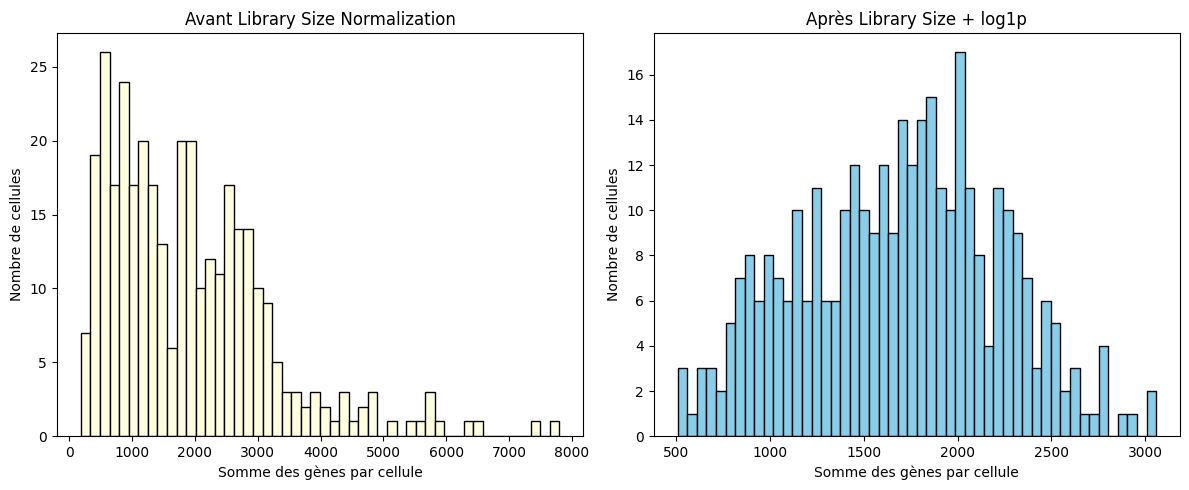


Résumé après Library Size + log1p (T_cells_CD8+) :
   min       max      mean  median       std  sparsity
0  0.0  8.042416  0.124453     0.0  0.534876  0.940493


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : T_cells_CD8+
# -----------------------------
X_dense = df_cd8.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (T_cells_CD8+) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightyellow', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (T_cells_CD8+) :")
print(summary_log)


In [24]:
import pandas as pd
import numpy as np

# Supposons que les colonnes de df_* sont les gènes
gene_names = df_cancer.columns

def top_genes(df_class, top_n=500):
    """
    Renvoie les top_n gènes les plus exprimés en moyenne dans cette classe.
    """
    mean_per_gene = df_class.mean(axis=0)  # moyenne par gène
    top_genes = mean_per_gene.sort_values(ascending=False).head(top_n)
    return top_genes

# Top gènes pour chaque classe
top_cancer = top_genes(df_cancer)
top_nk     = top_genes(df_nk)
top_cd4    = top_genes(df_cd4)
top_cd8   = top_genes(df_cd8)

# Affichage
print("Top gènes Cancer_cells :")
print(top_cancer)


Top gènes Cancer_cells :
6340     155.485229
6981      91.924049
6982      75.860756
6983      61.721519
4256      57.860760
            ...    
4184       1.658228
647        1.654008
11553      1.654008
1151       1.645570
9977       1.641350
Length: 500, dtype: float32


In [25]:
print("\nTop gènes NK_cells :")
print(top_nk)


Top gènes NK_cells :
6340     88.705879
1017     38.352940
11841    28.317648
6981     17.905882
6983     16.694118
           ...    
11092     0.470588
1233      0.470588
8777      0.470588
7262      0.470588
939       0.470588
Length: 500, dtype: float32


In [26]:
print("\nTop gènes T_cells_CD4+ :")
print(top_cd4)


Top gènes T_cells_CD4+ :
6340     131.872025
1017      50.443451
11841     45.303570
3371      31.562500
9825      29.735119
            ...    
1310       0.657738
12680      0.654762
8697       0.654762
1898       0.654762
9368       0.651786
Length: 500, dtype: float32


In [27]:
print("\nTop gènes T_cells_CD8+ :")
print(top_cd8)


Top gènes T_cells_CD8+ :
6340     89.646202
1017     37.865498
11841    33.470760
6981     17.991228
9825     17.467836
           ...    
8538      0.459064
11787     0.456140
1490      0.456140
10127     0.456140
11548     0.456140
Length: 500, dtype: float32


In [28]:
# Top gènes T_cells_CD4+ et T_cells_CD8+ (juste les indices/gènes)
top_cd4_genes = [6340, 1017, 11841, 3371, 9825, 9792, 170, 9742, 6981, 9747,
                 9783, 9815, 9808, 6982, 9816, 9765, 9771, 9770, 11839, 9748]

top_cd8_genes = [6340, 1017, 11841, 6981, 9825, 170, 9792, 9742, 3371, 6982,
                 5000, 9747, 6983, 9808, 9783, 9765, 9816, 9815, 9812, 9793]

# 🔹 Gènes similaires (présents dans les deux)
genes_similaires = list(set(top_cd4_genes).intersection(top_cd8_genes))

# 🔹 Gènes différents (présents seulement dans CD4 ou CD8)
genes_diff_cd4 = list(set(top_cd4_genes) - set(top_cd8_genes))
genes_diff_cd8 = list(set(top_cd8_genes) - set(top_cd4_genes))

print("Gènes similaires :")
print(sorted(genes_similaires))

print("\nGènes spécifiques à CD4+ :")
print(sorted(genes_diff_cd4))

print("\nGènes spécifiques à CD8+ :")
print(sorted(genes_diff_cd8))



Gènes similaires :
[170, 1017, 3371, 6340, 6981, 6982, 9742, 9747, 9765, 9783, 9792, 9808, 9815, 9816, 9825, 11841]

Gènes spécifiques à CD4+ :
[9748, 9770, 9771, 11839]

Gènes spécifiques à CD8+ :
[5000, 6983, 9793, 9812]


In [29]:
import pandas as pd
from collections import Counter

# -----------------------------
# 1️⃣ Sélection des gènes les plus exprimés (top 20)
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(20)
top_nk_filtered = top_nk.sort_values(ascending=False).head(20)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(20)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(20)

# -----------------------------
# 2️⃣ Supprimer les gènes communs à plusieurs catégories
# -----------------------------
all_genes = [
    set(top_cancer_filtered.index),
    set(top_nk_filtered.index),
    set(top_cd4_filtered.index),
    set(top_cd8_filtered.index)
]

gene_counts = Counter([gene for genes in all_genes for gene in genes])

# Garder uniquement les gènes présents dans une seule catégorie
selected_genes_unique = [gene for gene, count in gene_counts.items() if count == 1]

# Filtrer chaque catégorie pour ne garder que les gènes uniques
top_cancer_unique = [g for g in top_cancer_filtered.index if g in selected_genes_unique]
top_nk_unique = [g for g in top_nk_filtered.index if g in selected_genes_unique]
top_cd4_unique = [g for g in top_cd4_filtered.index if g in selected_genes_unique]
top_cd8_unique = [g for g in top_cd8_filtered.index if g in selected_genes_unique]

# -----------------------------
# 3️⃣ Créer le nouveau DataFrame filtré
# -----------------------------
selected_genes_final = set(top_cancer_unique + top_nk_unique + top_cd4_unique + top_cd8_unique)
df_selected = pd.concat([df_cancer, df_nk, df_cd4, df_cd8])
df_selected = df_selected.loc[:, df_selected.columns.intersection(selected_genes_final)]

print(f"\nNombre total de gènes sélectionnés : {len(selected_genes_final)}")
print("\nDimensions du nouveau jeu de données filtré :")
print(df_selected.shape)



Nombre total de gènes sélectionnés : 15

Dimensions du nouveau jeu de données filtré :
(1000, 15)


In [30]:
import pandas as pd

# -----------------------------
# Sélection des 20 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(50)
top_nk_filtered = top_nk.sort_values(ascending=False).head(50)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(50)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(50)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# Afficher la liste des gènes pour chaque catégorie
df_genes


,Cancer_cells,NK_cells,T_cells_CD4+,T_cells_CD8+
4352,1,1,0,0
4999,0,1,1,1
5000,0,1,1,1
5001,0,1,0,1
9742,1,1,1,1
...,...,...,...,...
9832,1,1,1,1
9831,0,0,1,0
9834,0,1,1,1
9846,1,0,1,0


In [31]:
import pandas as pd

# -----------------------------
# Sélection des 100 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(200)
top_nk_filtered = top_nk.sort_values(ascending=False).head(200)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(200)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(200)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# Ajouter une colonne 'Total' qui est la somme des lignes
df_genes['Total'] = df_genes.sum(axis=1)

# Afficher le DataFrame
df_genes



,Cancer_cells,NK_cells,T_cells_CD4+,T_cells_CD8+,Total
8711,0,1,0,0,1
12297,0,1,0,0,1
9742,1,1,1,1,4
9743,1,1,1,1,4
9745,1,1,1,1,4
...,...,...,...,...,...
12277,1,0,0,0,1
12790,1,0,0,0,1
1017,1,1,1,1,4
12286,0,1,1,1,3


In [32]:
import pandas as pd

# -----------------------------
# Sélection des 200 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(200)
top_nk_filtered = top_nk.sort_values(ascending=False).head(200)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(200)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(200)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# -----------------------------
# Ajouter la colonne 'Total' qui somme les lignes
# -----------------------------
df_genes['Total'] = df_genes.sum(axis=1)

# -----------------------------
# Extraire les gènes dont la colonne 'Total' est égale à 1
# -----------------------------
genes_total_1 = df_genes[df_genes['Total'] == 1].index.tolist()

# Afficher la liste des gènes avec total = 1
print("Liste des gènes dont le total est égal à 1 :")
print(genes_total_1)


Liste des gènes dont le total est égal à 1 :
[8711, 12297, 6673, 6701, 559, 1598, 1601, 4692, 2657, 6246, 6252, 633, 635, 636, 5243, 7293, 11385, 7292, 8314, 5242, 6271, 5775, 4752, 10896, 5219, 4813, 10908, 5277, 12459, 2733, 8878, 12465, 2653, 4792, 5817, 5818, 5821, 11966, 4286, 4804, 11467, 11468, 5343, 5858, 5859, 5864, 10476, 4854, 9996, 5956, 1825, 1828, 2343, 3364, 5147, 5951, 5156, 1892, 8576, 6531, 10116, 11143, 1934, 5007, 7054, 5012, 5013, 11165, 1949, 421, 943, 5051, 12741, 10185, 5076, 2525, 2526, 2527, 2528, 3552, 2530, 1012, 12277, 12790]


In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-4)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
           # ("scaler", StandardScaler(with_mean=True, with_std=True)),
           # ("select", SelectKBest(
            #    score_func=f_classif,
             #   k=2000  #  à ajuster (1000–5000)
            #)),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 

In [34]:
# Gènes ayant un total de 1
genes_total_1 = [9779, 9814, 2152, 8568, 635, 636, 1937, 5015, 7331, 10177, 
                 4801, 10955, 9935, 9940, 9941, 4567, 2779, 2528, 9763, 12286]

# Vérifier que les indices des gènes sont valides dans X_train
valid_genes = [gene for gene in genes_total_1 if gene < X_train.shape[1]]  # Assurez-vous que les indices sont dans la plage de colonnes de X_train

# Si tous les gènes sont valides, vous pouvez sélectionner ces colonnes
X_train_selected = X_train[:, valid_genes]  # Sélectionner les colonnes correspondant aux indices valides

# Si X_train est une matrice sparse, convertissez-la en DataFrame pour une meilleure lisibilité
import pandas as pd
X_train_selected_df = pd.DataFrame(X_train_selected.toarray())  # Conversion en DataFrame pour une meilleure compréhension

# Vérifiez les dimensions de X_train_selected
print(f"Dimensions de X_train_selected : {X_train_selected_df.shape}")


Dimensions de X_train_selected : (1000, 20)


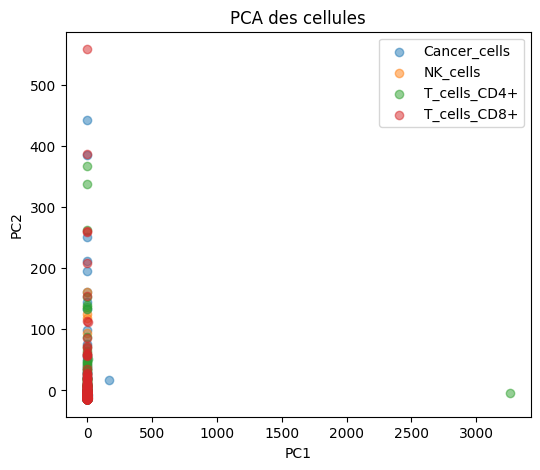

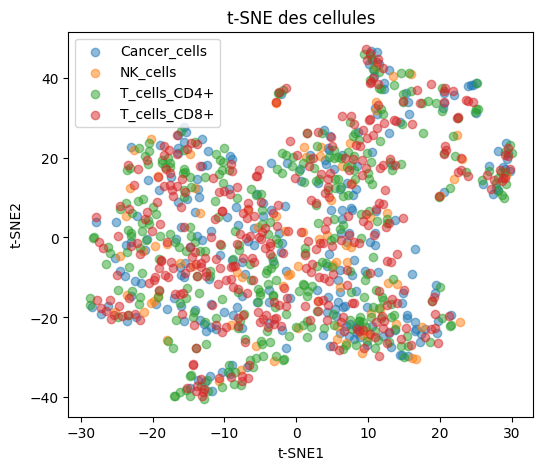

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


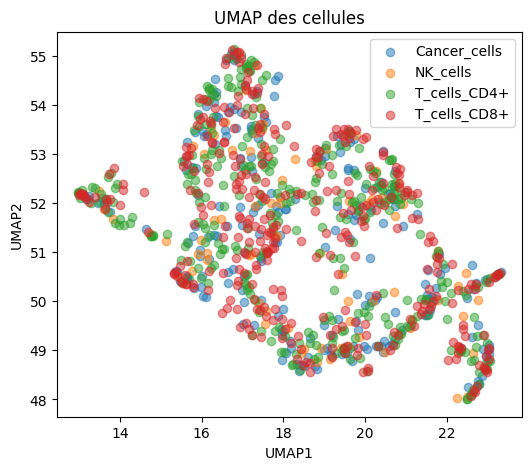

In [35]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np

# -----------------------------
# 1️⃣ Préparer les données
# -----------------------------
X = X_train_selected_df.astype(float)

# Labels pour colorer les points
labels = (
    ['Cancer_cells'] * df_cancer.shape[0] +
    ['NK_cells'] * df_nk.shape[0] +
    ['T_cells_CD4+'] * df_cd4.shape[0] +
    ['T_cells_CD8+'] * df_cd8.shape[0]
)
labels = np.array(labels)

# Couleurs pour chaque classe
colors = {'Cancer_cells':'red', 'NK_cells':'green', 'T_cells_CD4+':'blue', 'T_cells_CD8+':'orange'}

# -----------------------------
# 2️⃣ PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=cls, alpha=0.5)
plt.title("PCA des cellules")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# 3️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=cls, alpha=0.5)
plt.title("t-SNE des cellules")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

# -----------------------------
# 4️⃣ UMAP
# -----------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_umap[idx,0], X_umap[idx,1], label=cls, alpha=0.5)
plt.title("UMAP des cellules")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


# New 

In [36]:
type(X_train)

scipy.sparse._csr.csr_matrix

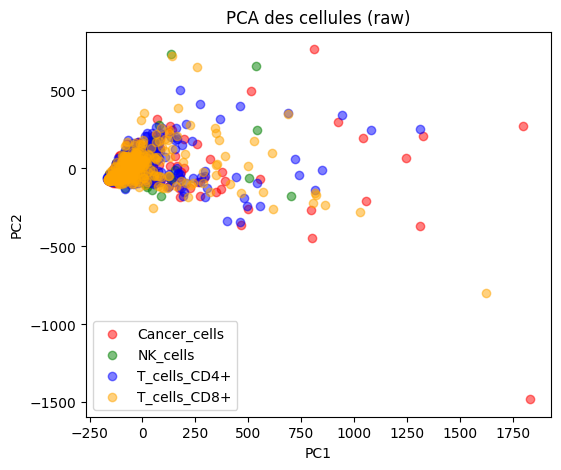

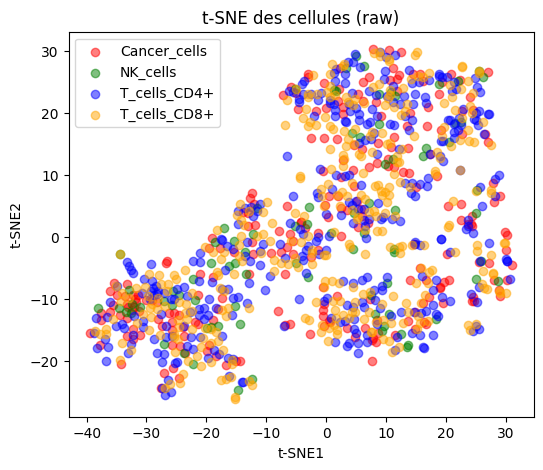

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


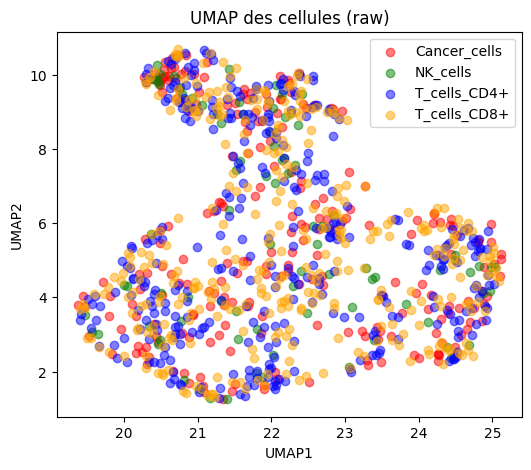

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.sparse import vstack

# -----------------------------
# 1️⃣ Convertir X_train en dense
# -----------------------------
X_dense = X_train.toarray() 
 # si la matrice est trop grosse, utiliser X_train directement

# -----------------------------
# 2️⃣ Créer les labels
# -----------------------------
labels = np.array(
    ['Cancer_cells'] * df_cancer.shape[0] +
    ['NK_cells'] * df_nk.shape[0] +
    ['T_cells_CD4+'] * df_cd4.shape[0] +
    ['T_cells_CD8+'] * df_cd8.shape[0]
)

# Vérification
assert X_dense.shape[0] == len(labels), "Nombre de labels != nombre de cellules"

colors = {'Cancer_cells':'red', 'NK_cells':'green', 'T_cells_CD4+':'blue', 'T_cells_CD8+':'orange'}

# -----------------------------
# 3️⃣ PCA
# -----------------------------
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("PCA des cellules (raw)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# 4️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("t-SNE des cellules (raw)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ UMAP
# -----------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_umap[idx,0], X_umap[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("UMAP des cellules (raw)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


In [38]:
import numpy as np

moyenne = np.mean(X_log, axis=0)
mediane = np.median(X_log, axis=0)

import pandas as pd

stats = pd.DataFrame({
    "moyenne": moyenne,
    "mediane": mediane
})

mask = moyenne >= 0.1

X_filtered = X_dense[:, mask]
stats_filtered = stats[mask]

print("Avant :", X_dense.shape)
print("Après :", X_filtered.shape)

print(stats_filtered.head())

from scipy.sparse import csr_matrix

X_filtered_sparse = csr_matrix(X_filtered)



Avant : (1000, 13551)
Après : (1000, 3736)
     moyenne  mediane
0   0.118260      0.0
9   0.417270      0.0
11  0.168356      0.0
17  0.102743      0.0
19  0.157085      0.0


In [39]:
import pandas as pd
import numpy as np

# -----------------------------
# Exemple : top 100 gènes par classe (à partir de tes séries top_XXX)
# -----------------------------
# Ici tu prends 100 gènes par classe
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(500)
top_nk_filtered = top_nk.sort_values(ascending=False).head(500)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(500)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(500)

# -----------------------------
# Liste de tous les gènes sélectionnés
# -----------------------------
genes_all = list(set(
    top_cancer_filtered.index
    ).union(top_nk_filtered.index,
            top_cd4_filtered.index,
            top_cd8_filtered.index))

# -----------------------------
# Construire un DataFrame vide avec ces gènes
# -----------------------------
df_genes = pd.DataFrame(index=genes_all)

# Ajouter les colonnes pour chaque classe
df_genes['Cancer_cells'] = df_genes.index.map(lambda g: top_cancer_filtered.get(g, 0))
df_genes['NK_cells'] = df_genes.index.map(lambda g: top_nk_filtered.get(g, 0))
df_genes['T_cells_CD4+'] = df_genes.index.map(lambda g: top_cd4_filtered.get(g, 0))
df_genes['T_cells_CD8+'] = df_genes.index.map(lambda g: top_cd8_filtered.get(g, 0))

# -----------------------------
# Colonne 'Total' = somme des colonnes
# -----------------------------
df_genes['Total'] = df_genes[['Cancer_cells','NK_cells','T_cells_CD4+','T_cells_CD8+']].sum(axis=1)

# -----------------------------
# Affichage
# -----------------------------
df_genes = df_genes.sort_values('Total', ascending=False)
print(df_genes)


       Cancer_cells   NK_cells  T_cells_CD4+  T_cells_CD8+       Total
6340     155.485229  88.705879    131.872025     89.646202  465.709335
6981      91.924049  17.905882     23.809525     17.991228  151.630684
1017      20.320675  38.352940     50.443451     37.865498  146.982563
11841     21.413502  28.317648     45.303570     33.470760  128.505480
6982      75.860756  15.458823     19.538691     13.599415  124.457685
...             ...        ...           ...           ...         ...
8777       0.000000   0.470588      0.000000      0.000000    0.470588
2266       0.000000   0.000000      0.000000      0.467836    0.467836
1852       0.000000   0.000000      0.000000      0.464912    0.464912
11787      0.000000   0.000000      0.000000      0.456140    0.456140
11548      0.000000   0.000000      0.000000      0.456140    0.456140

[790 rows x 5 columns]


In [ ]:
top_df_genes = df_genes.sort_values('Total', ascending=False).index.tolist()

common_genes = set(selected_genes).intersection(top_df_genes)
print(f"Nombre de gènes communs : {len(common_genes)}")
print("Exemples de gènes communs :", list(common_genes)[:20])

unique_selected = set(selected_genes) - set(df_genes)
print("Gènes uniquement dans SelectKBest :", list(unique_selected)[:20])

unique_df_genes = set(top_df_genes) - set(selected_genes)
print("Gènes uniquement dans df_genes :", list(unique_df_genes)[:20])


Nombre de gènes communs : 477
Exemples de gènes communs : [4100, 12297, 2063, 8212, 12316, 4129, 4141, 10311, 8268, 12374, 6246, 6252, 2169, 2170, 8314, 122, 10374, 10376, 4256, 4257]
Gènes uniquement dans SelectKBest : [12288, 4100, 12297, 10, 11, 8204, 8205, 4110, 12305, 8212, 8216, 12315, 12316, 4129, 4134, 39, 4141, 4143, 8241, 4147]
Gènes uniquement dans df_genes : [8196, 12294, 12330, 10282, 12331, 4138, 12336, 12337, 12346, 4157, 6220, 83, 8278, 4184, 2152, 4202, 4203, 12408, 6271, 170]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray() if hasattr(X_sparse, "toarray") else X_sparse

    # Log transform
    X = np.log1p(X)

    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)

    return X

class Classifier:
    def __init__(self):
        # Définition des modèles de base pour le stacking
        base_estimators = [
            ("rf", RandomForestClassifier(
                n_estimators=300,
                class_weight="balanced",
                max_depth=None,
                random_state=42,
                n_jobs=-1
            )),
            
            ("gb", GradientBoostingClassifier(
                n_estimators=200,
                learning_rate=0.1,
                max_depth=3,
                random_state=42
            ))
        ]

        # Modèle final du stacking
        final_estimator = RandomForestClassifier(
            n_estimators=300,
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        )

        # Pipeline complet
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(score_func=f_classif, k=2000)),
            ("clf", StackingClassifier(
                estimators=base_estimators,
                final_estimator=final_estimator,
                cv=5,
                n_jobs=-1,
                passthrough=True
            ))
        ])

    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        # Équilibrage des classes par duplication (oversampling simple)
        X_df = pd.DataFrame(X)
        y_df = pd.Series(y)
        class_counts = y_df.value_counts()
        max_size = class_counts.max()

        X_bal, y_bal = [], []
        for label in class_counts.index:
            X_c = X_df[y_df == label]
            y_c = y_df[y_df == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_bal.append(pd.concat([X_c, X_dup]))
                y_bal.append(pd.concat([y_c, y_dup]))
            else:
                X_bal.append(X_c)
                y_bal.append(y_c)

        X_bal = pd.concat(X_bal).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_bal).sample(frac=1, random_state=42)
        X_bal = np.array(X_bal)
        y_bal = np.array(y_bal)

        self.pipe.fit(X_bal, y_bal)
        return self

    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)

    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(
                score_func=f_classif,
                k=2000  #  à ajuster (1000–5000)
            )),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 

In [18]:
# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  249   508   818  1125  1450  1580  1621  1686  2300  2402  2441  3156
  3405  3871  4050  4353  4471  4839  5547  6088  7882  7984  8088  8414
  8763  8822  9659  9693  9720 10241 10391 10541 10823 11225 11359 11417
 11430 11774 11860 12231 12270 12497 13008 13204 13247] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


KeyboardInterrupt: 

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


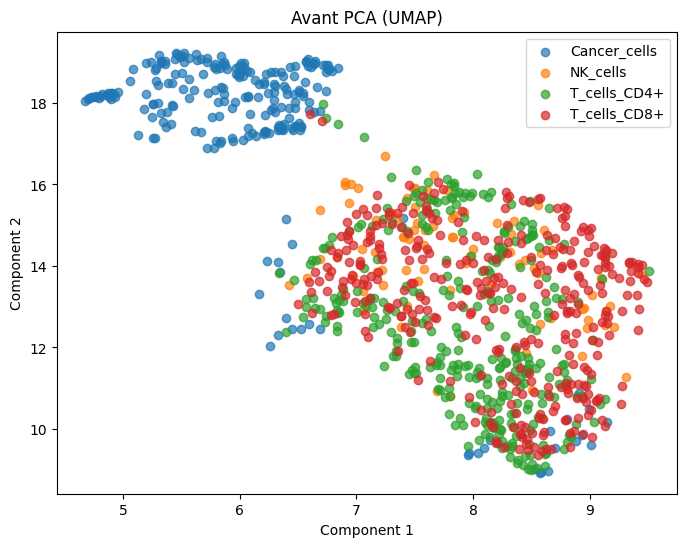

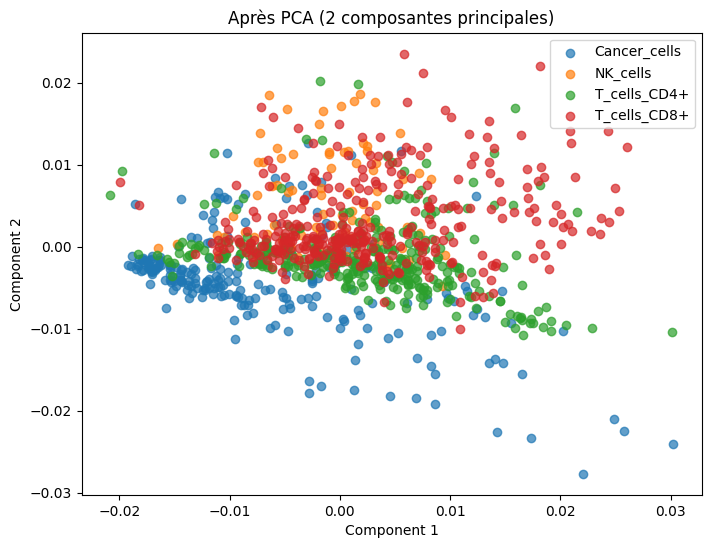

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# =========================
# Préprocessing standard RNA-seq
# =========================
def preprocess_X(X_sparse):
    X = X_sparse.toarray() if hasattr(X_sparse, "toarray") else X
    X = np.log1p(X)
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
    return X

# =========================
# Fonction pour visualiser en 2D
# =========================
def plot_2d_representation(X, y, title="2D Representation"):
    plt.figure(figsize=(8,6))
    for label in np.unique(y):
        plt.scatter(
            X[y==label, 0],
            X[y==label, 1],
            label=label,
            alpha=0.7
        )
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.legend()
    plt.show()

# =========================
# Exemple d'utilisation
# =========================
# X_train = données d'entraînement (sparse matrix)
# y_train = labels

# Préprocessing
X_processed = preprocess_X(X_train)

# -- Avant PCA (optionnel : UMAP pour 2D)
import umap
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(X_processed)
plot_2d_representation(X_umap, y_train, title="Avant PCA (UMAP)")

# -- Après PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)
plot_2d_representation(X_pca, y_train, title="Après PCA (2 composantes principales)")


# Regression logistique

**Hétérogénéité des classes** : les effectifs diffèrent fortement entre les classes, ce qui peut entraîner une sous-représentation de certaines d’entre elles et biaiser les modèles de classification. Il est donc nécessaire de mettre en place des stratégies adaptées pour prendre en compte ce déséquilibre.

**Distribution des valeurs d’expression génique**: les données présentent une grande étendue de valeurs, une forte dispersion ainsi qu’un nombre important de zéros, caractéristiques des données RNA-seq et scRNA-seq. Ces propriétés imposent l’utilisation de méthodes de normalisation et de transformation appropriées afin de réduire le bruit et stabiliser la variance.

**Similarité entre certaines classes** : trois classes présentent des profils d’expression très proches, rendant leur séparation particulièrement difficile. Cette proximité biologique limite l’efficacité des frontières de décision simples et nécessite des approches de sélection de gènes et de modélisation adaptées.

**Nombre de gènes** : Un grand nombre de gènes ont une faible expression. Le jeu de données est de haute dimension, ce qui rend l'analyse plus complexe.

Les données d’expression génique ont été prétraitées selon un pipeline standard en RNA-seq. Une transformation logarithmique log1p a d’abord été appliquée afin de stabiliser la variance et de réduire l’impact des valeurs extrêmes. Les données ont ensuite été normalisées par cellule en divisant chaque gène par la somme totale des counts de la cellule, permettant ainsi de corriger les variations techniques liées à la profondeur de séquençage. Enfin, une standardisation des variables a été réalisée afin de garantir une optimisation stable des modèles de classification.

**Sélection de gènes avec SelectKBest** :
Pour réduire la dimensionnalité de notre jeu de données tout en conservant les informations les plus pertinentes pour la classification, nous avons utilisé la méthode SelectKBest. Cette méthode sélectionne les K meilleures caractéristiques (dans ce cas, les gènes) en fonction de leur capacité à discriminer les classes cibles.
score_func=f_classif : Le critère de sélection choisi est f_classif, qui calcule la statistique F pour chaque gène afin de mesurer la relation entre chaque gène et la variable cible. Ce test est souvent utilisé pour les données de type "ANOVA" et permet de déterminer l'importance de chaque gène pour la prédiction de la classe. En d'autres termes, il évalue la variance des gènes entre les différentes classes.
k=2000 : Cela signifie que nous avons choisi de conserver les 2000 gènes les plus importants, ceux qui présentent les meilleures statistiques F et qui, selon ce critère, sont les plus discriminants pour la tâche de classification. Ce nombre peut être ajusté en fonction de la taille du jeu de données et de la complexité de la tâche. Un nombre plus faible peut être utilisé si nous voulons éviter la surcharge computationnelle, tandis qu'un nombre plus élevé peut aider à capturer plus d'informations, mais risque aussi d'introduire plus de bruit.
L'objectif de cette méthode est de simplifier le modèle tout en maximisant la performance en éliminant les gènes qui apportent peu ou pas d'information pour distinguer les classes.

J'ai opté pour une régression logistique pour cette tâche de classification car elle est bien adaptée aux problèmes de classification binaire avec un grand nombre de caractéristiques (comme c’est le cas avec les données de RNA-seq). De plus, l'analyse exploratoire via l'ACP a montré que les classes étaient linéairement séparables dans l'espace réduit des composantes principales, ce qui est une condition idéale pour l'utilisation de la régression logistique. En outre, l'utilisation de la régularisation L1 permet de réduire le risque de sur-apprentissage et d'effectuer une sélection de caractéristiques, ce qui est crucial compte tenu de la grande dimension du jeu de données (>13 000 gènes). Enfin, le paramètre class_weight="balanced" nous permet de compenser les déséquilibres de classes, qui sont fréquents dans les études biologiques où certaines classes sont sous-représentées. Cette approche permet de tirer parti de la simplicité, de l'interprétabilité et de l'efficacité de la régression logistique tout en répondant aux spécificités du jeu de données.

Afin de gérer le déséquilibre entre les classes, nous avons utilisé le paramètre
class_weight="balanced" dans la régression logistique.
Cette approche ne crée pas de nouvelles données, mais modifie la fonction de coût afin de pénaliser davantage les erreurs commises sur les classes minoritaires.
Ainsi, chaque classe contribue de manière équitable à l’apprentissage du modèle, malgré des effectifs inégaux.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(
                score_func=f_classif,
                k=2000  #  à ajuster (1000–5000)
            )),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

def preprocess_X(X_sparse):
    """
    Prétraitement RNA-seq :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray() if hasattr(X_sparse, "toarray") else X_sparse
    X = np.log1p(X)
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
    return X

class Classifier:
    def __init__(self, k_genes=2000, n_components=50):
        self.k_genes = k_genes
        self.n_components = n_components

        # Étape 1 : SVM Cancer_cells vs autres
        self.svm_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("select", SelectKBest(score_func=f_classif, k=self.k_genes)),
            ("pca", PCA(n_components=self.n_components)),
            ("svm", SVC(kernel="rbf", class_weight="balanced", probability=True))
        ])

        # Étape 2 : Gradient Boosting pour les 3 autres classes
        self.gb_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("select", SelectKBest(score_func=f_classif, k=self.k_genes)),
            ("pca", PCA(n_components=self.n_components)),
            ("gb", GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=5))
        ])

    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        y = np.array(y)

        # Masque Cancer_cells vs autres
        mask_cancer = y == "Cancer_cells"
        mask_other = ~mask_cancer

        if mask_cancer.sum() == 0 or mask_other.sum() == 0:
            raise ValueError("Le jeu de données doit contenir au moins une cellule Cancer_cells et une non-Cancer_cells")

        # Fit SVM pour Cancer_cells
        self.svm_pipeline.fit(X, mask_cancer)

        # Oversampling manuel pour les autres classes
        X_non_cancer = pd.DataFrame(X[mask_other])
        y_non_cancer = pd.Series(y[mask_other])
        class_counts = y_non_cancer.value_counts()
        max_size = class_counts.max()
        X_bal, y_bal = [], []

        for label in class_counts.index:
            X_c = X_non_cancer[y_non_cancer == label]
            y_c = y_non_cancer[y_non_cancer == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_bal.append(pd.concat([X_c, X_dup]))
                y_bal.append(pd.concat([y_c, y_dup]))
            else:
                X_bal.append(X_c)
                y_bal.append(y_c)

        X_bal = pd.concat(X_bal).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_bal).sample(frac=1, random_state=42)
        X_bal = np.array(X_bal)

        # Fit Gradient Boosting sur les autres classes
        self.gb_pipeline.fit(X_bal, y_bal)

        return self

    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        pred_cancer = self.svm_pipeline.predict(X)
        final_pred = []

        for i, is_cancer in enumerate(pred_cancer):
            if is_cancer:
                final_pred.append("Cancer_cells")
            else:
                final_pred.append(self.gb_pipeline.predict(X[i].reshape(1, -1))[0])
        return np.array(final_pred)

    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        prob_cancer = self.svm_pipeline.predict_proba(X)[:, 1]
        prob_non_cancer = self.gb_pipeline.predict_proba(X)
        
        final_prob = []
        for i, pc in enumerate(prob_cancer):
            if pc >= 0.5:
                final_prob.append([pc] + [0]*(prob_non_cancer.shape[1]))
            else:
                probs = prob_non_cancer[i] * (1 - pc)
                final_prob.append([1 - np.sum(probs)] + list(probs))
        return np.array(final_prob)



clf = Classifier(k_genes=2000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_proba = clf.predict_proba(X_test)



from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

y_true = y_test  # si tu as les labels de test

print("Balanced Accuracy :", balanced_accuracy_score(y_true, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_true, y_pred))
print("Classification Report :\n", classification_report(y_true, y_pred))



/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   32    43    76    81    91    97   103   121   149   165   193   214
   216   223   236   239   240   247   249   257   259   277   278   286
   341   356   450   467   469   487   491   508   519   542   555   566
   568   611   621   622   656   657   660   679   695   707   709   710
   713   727   732   775   809   818   820   833   841   851   856   930
   959   971  1008  1016  1022  1029  1036  1042  1047  1049  1075  1085
  1099  1108  1112  1125  1139  1142  1158  1161  1181  1194  1196  1197
  1208  1209  1212  1370  1405  1411  1424  1431  1441  1442  1466  1470
  1476  1480  1514  1549  1560  1580  1581  1587  1589  1590  1591  1600
  1606  1621  1630  1633  1635  1646  1659  1664  1665  1670  1686  1726
  1746  1754  1801  1814  1854  1862  1997  1998  2001  2002  2036  2047
  205

Balanced Accuracy : 0.7758770242186731
Confusion Matrix :
 [[115   0   3   0]
 [  0  21   4  18]
 [  0   1 142  25]
 [  0   1  34 136]]
Classification Report :
               precision    recall  f1-score   support

Cancer_cells       1.00      0.97      0.99       118
    NK_cells       0.91      0.49      0.64        43
T_cells_CD4+       0.78      0.85      0.81       168
T_cells_CD8+       0.76      0.80      0.78       171

    accuracy                           0.83       500
   macro avg       0.86      0.78      0.80       500
weighted avg       0.84      0.83      0.83       500



In [30]:
# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: divide by zero encountered in divide
  msb = ssbn / float(dfbn)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


ValueError: The number of classes has to be greater than one; got 1 class